<a href="https://colab.research.google.com/github/BachokunIAR/ML_code/blob/main/Airline_customer_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer satisfaction in the Airline industry is dependent on various reasons as to why a customer will choose a particular airline over the other. The algorithm here seeks to make predcitions and highlight some of the major reasons that inform customer decision. The model wa train uing the SVM (support vector machine) .  Based on a customer experience , the algorithm is able to tell wheter a customer is satisfied or

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files

In [41]:
upload = files.upload()

Saving Invistico_Airline.csv to Invistico_Airline (1).csv


In [42]:
!ls

'Invistico_Airline (1).csv'   Invistico_Airline.csv   sample_data


In [43]:
data = pd.read_csv('Invistico_Airline.csv')
pd.set_option('display.max_columns',None)
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [44]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [46]:
num_col = list(data.describe().columns)
col_categorical = list(set(data.columns).difference(num_col))
remove_list = []
col_numerical = [ e for e in num_col if e not in remove_list]

In [47]:
categorical_col = []
for k, v in data.items():
    if v.dtype =='object':
        categorical_col.append(k)

print(categorical_col)

['satisfaction', 'Customer Type', 'Type of Travel', 'Class']


In [48]:
print(len(num_col))
print(len(col_numerical))
print(len(col_categorical))

18
18
4


In [49]:
data[col_numerical].corr()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011248
Flight Distance,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.110103
Seat comfort,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025506
Departure/Arrival time convenient,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002599
Food and drink,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014881
Gate location,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003640
Inflight wifi service,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035270
Inflight entertainment,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033321
Online support,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.036087
Ease of Online booking,0.071594,-0.022299,0.211531,0.001755,0.041189,0.001442,0.601100,0.321731,0.617489,1.000000,0.436264,0.355122,0.398322,0.137744,0.417675,0.684320,-0.036545,-0.039806


# Heatmap

<Axes: >

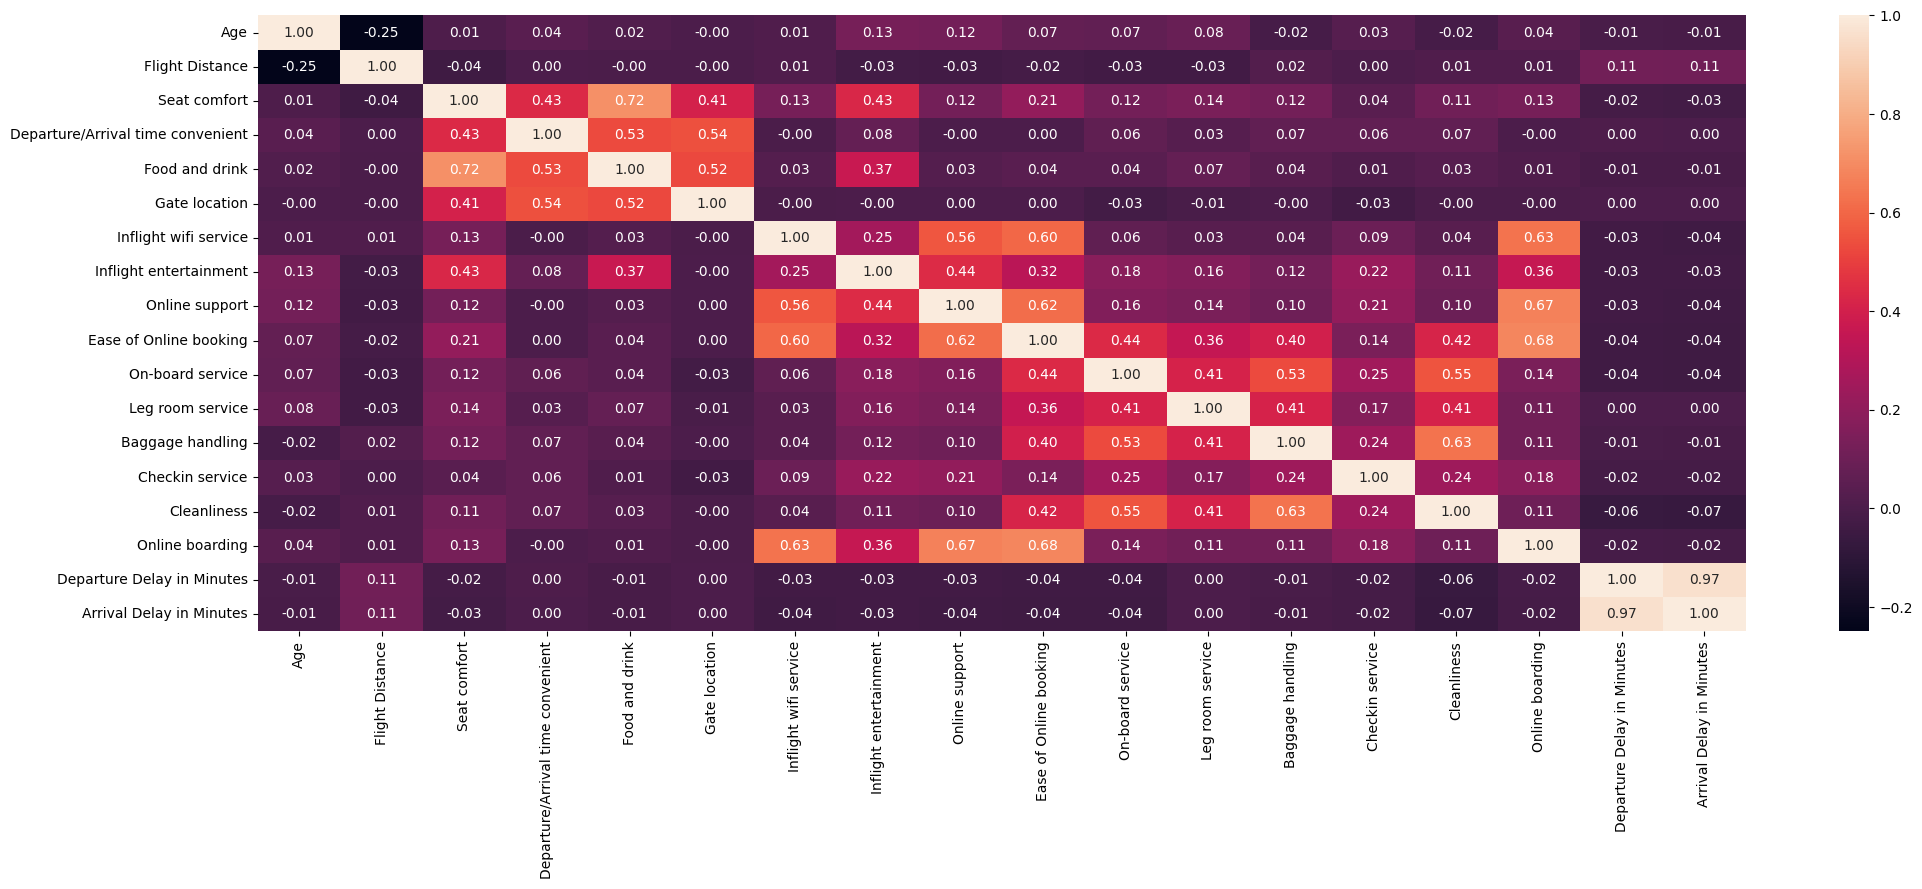

In [50]:
plt.figure(figsize = (24,8))
sns.heatmap(data[col_numerical].corr(),annot = True, fmt = '.2f')


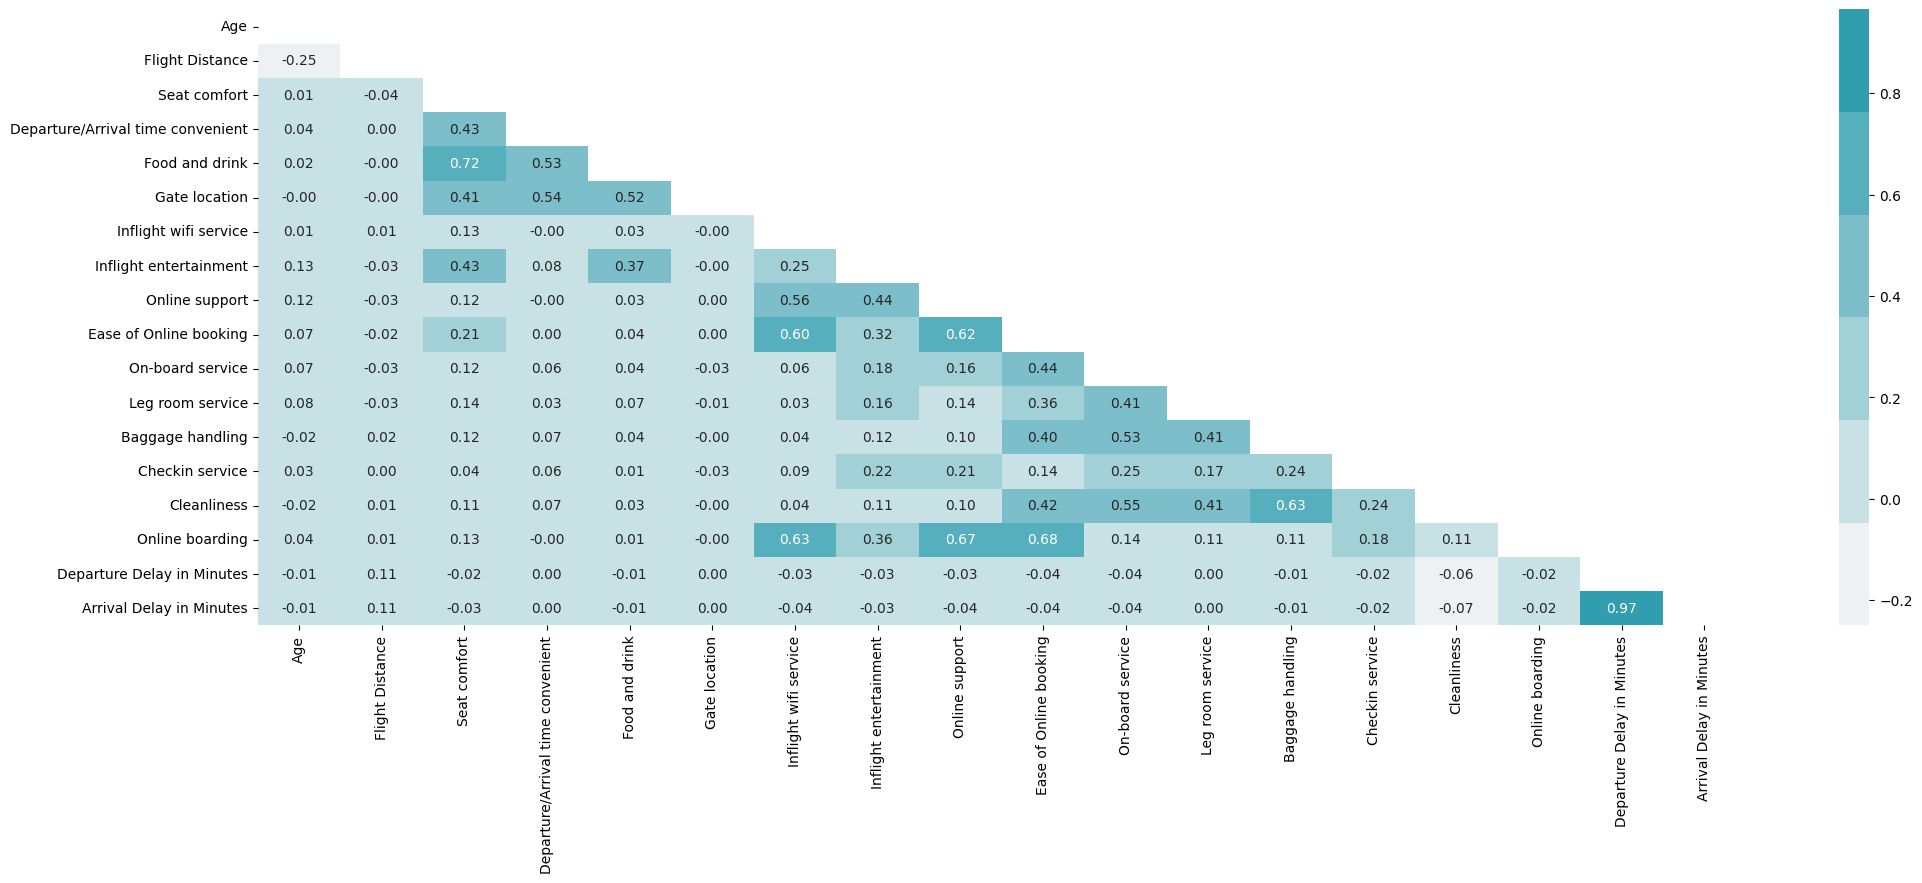

In [51]:
plt.figure(figsize=(24,8))
#  mask for the upper triangle
mask = np.zeros_like(data[col_numerical].corr(), dtype=bool)
mask[np.triu_indices_from(mask)]=True
# generate a custom diverging colormap

cmap = sns.light_palette((210,90,60), input = 'husl')

# heatmap with mask and correct aspect ratio
sns.heatmap(data[col_numerical].corr(),mask = mask, cmap = cmap, annot = True, fmt = ".2f");

# This help us to establish the columns that have much influence on the our model.

## $\cdot$ Age,cleanliness, online boarding, checking service ,gate location, flight distance had no significant  effect on the the training and so can be ignored

In [52]:
data['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [53]:
num_col = list(data.describe().columns)
col_categorical = list(set(data.columns).difference(num_col))
remove_list = ['satisfaction','Customer Type','Type of Travel','Class']
col_numerical = [ e for e in num_col if e not in remove_list]



satisfaction_to_num ={'satisfied' : 1,
                  'dissatisfied': 0}

data['satisfaction'] =data['satisfaction'].map(satisfaction_to_num)
col_categorical.remove('satisfaction')
data_cat = pd.get_dummies(data[col_categorical])
x = pd.concat([data[col_numerical],data_cat],axis =1)

y = data['satisfaction']

In [54]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64

In [70]:
df = pd.concat([x,y],axis = 1)

df1 = df.drop(['Age','Cleanliness','Online boarding',
                                       'Checkin service' ,'Gate location', 'Flight Distance'],axis=1)

df1=df1.dropna()
df1.head()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Departure Delay in Minutes,Arrival Delay in Minutes,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,0,0,0,2,4,2,3,3,0,3,0,0.0,0,1,1,0,0,1,0,1
1,0,0,0,0,2,2,3,4,4,4,310,305.0,0,1,1,0,1,0,0,1
2,0,0,0,2,0,2,2,3,3,4,0,0.0,0,1,1,0,0,1,0,1
3,0,0,0,3,4,3,1,1,0,1,0,0.0,0,1,1,0,0,1,0,1
4,0,0,0,4,3,4,2,2,0,2,0,0.0,0,1,1,0,0,1,0,1


#<font color = red> Train , Test dataset, validation </font>

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
train , valid, test = np.split(df1.sample(frac=1), [int(0.6*len(df1)),int(0.8*len(df1))])

In [73]:
def scale_dataset(dataframe):
    x = dataframe[dataframe.cols[:-1]].values
    y = dataframe[dataframe.cols[-1]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    data = np.hstack((x,np.reshape(y,(-1,1))))
    return data, x,y

In [74]:
train

,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Departure Delay in Minutes,Arrival Delay in Minutes,Type of Travel_Business travel,Type of Travel_Personal Travel,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
114508,4,4,4,4,5,4,5,5,5,5,0,0.0,1,0,1,0,1,0,0,1
78764,4,5,5,4,3,1,4,1,4,4,3,0.0,1,0,1,0,0,0,1,0
102705,4,5,5,4,4,4,4,1,5,1,5,14.0,1,0,1,0,0,1,0,1
121871,5,5,5,5,5,5,5,1,2,4,0,14.0,1,0,1,0,1,0,0,1
77609,2,2,2,2,2,2,2,5,3,5,0,0.0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116731,4,4,4,5,4,5,5,5,5,5,0,0.0,1,0,1,0,1,0,0,1
68569,1,3,3,5,3,4,1,1,1,1,0,18.0,1,0,1,0,0,1,0,0
34470,4,4,4,1,4,1,1,3,4,4,0,0.0,0,1,1,0,0,1,0,0
1925,4,4,4,3,4,4,3,3,4,3,119,124.0,0,1,1,0,0,1,0,1


In [75]:
print(len(train[train['satisfaction']== 1]))

print(len(train[train['satisfaction']== 0]))


42474
35218


#<font color = red> Oversampling

In [76]:
from imblearn.over_sampling import RandomOverSampler

In [77]:
def scale_dataset(dataframe, oversample = False):

  x = dataframe[dataframe.columns[:-1]].values

  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)
  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data , x, y


# <font color =red> Now the data has thesame numer of dataset for both satisfaction and dissatisfaction </font>

In [78]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid ,y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [79]:
sum(y_train ==1)


42474

In [80]:
sum(y_train ==0)


42474

In [85]:
pd.set_option('display.max_columns',None)
valid

array([[-1.31493541,  0.65716996, -1.28288505, ...,  1.11557001,
        -0.278496  ,  0.        ],
       [ 0.1194137 ,  1.31100723,  1.49123604, ...,  1.11557001,
        -0.278496  ,  1.        ],
       [ 1.55376282,  0.65716996,  0.79770576, ..., -0.89640273,
        -0.278496  ,  0.        ],
       ...,
       [ 0.83658826,  0.65716996,  1.49123604, ...,  1.11557001,
        -0.278496  ,  1.        ],
       [-0.59776085, -0.65050459, -0.58935478, ..., -0.89640273,
        -0.278496  ,  1.        ],
       [ 1.55376282, -1.95817914,  1.49123604, ..., -0.89640273,
        -0.278496  ,  1.        ]])

# Instantiating the model

In [81]:
# suport vector Mchine
from sklearn.metrics import classification_report
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(x_train,y_train)

SVC()

In [82]:
y_pred = svm_model.predict(x_test)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11776
           1       0.95      0.93      0.94     14122

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898



# Prediction

In [88]:
input_data = (0	,0	,3	,4	,3	,1	,1	,0	,1	,0	,0.0	,0	,1	,1	,0	,0	,1	,0	,1)

input_data_np = np.asarray(input_data)
input_data_reshape = input_data_np.reshape(1,-1)

pred = svm_model.predict(input_data_reshape)
print(pred)
if(pred[0]==0):
  print("The customer is dessatisfied with our service")

else:
  print("The customer is sastisfy with our service")







[1]
The customer is sastisfy with our service
